# Intro to Matplotlib


In [1]:
import matplotlib.pyplot as plt

## Plot a sine wave

Create a sine wave using numpy. Begin with your x (input) array using ``np.arange(start, stop, step)`` or ``np.linspace(start, stop, num)``. Create your y (output) array using ``np.sin(x)``.

In [2]:
import numpy as np
x = np.linspace(0, 4 * np.pi)
y = np.sin(x)

Create your first plot using ``plt.plot()``. Note: you can do ``plt.plot(y)`` and output a sinusoidal plot, however, matplotlib will assume that each subsequent point is $\Delta x = 1$ apart. Since our input array is not spaced out in steps of 1, we need to pass the input array to ``plt.plot(x, y)``.

Once this is working, add some labels! Use ``plt.title()``, ``plt.xlabel()``, and ``plt.ylabel()``.

Add a second sinusoid to this plot (try just plotting ``-y``)

How about changing the color or line styles?
- There are two ways to set the line style and color:
    - Pass a string as the third argument to plt.plot starting with a color character followed by the linestyle (basic styles: '--', '-.', '.'). Try 'r--' for red dashed line.
    - Pass each separately as keywork arguments—this allows you far more options. Ex: plt.plot(x, y, color='firebrick', linestyle='dashed')

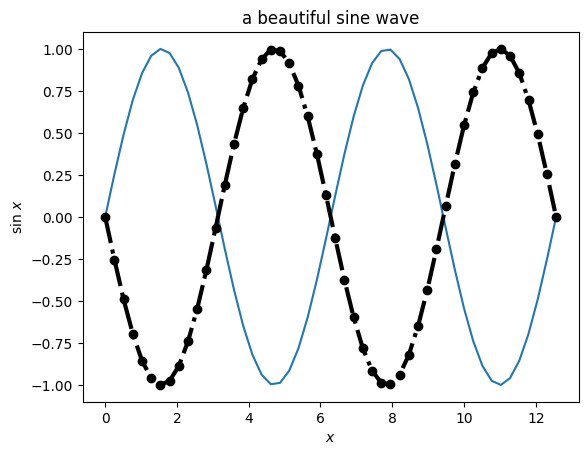

In [3]:
plt.plot(x, y)
plt.title('a beautiful sine wave')
plt.xlabel('$x$')
plt.ylabel('sin $x$')
plt.plot(x, -y, ls='-.', c='black', marker='o', lw=3)

## Creating figures and axes
> Quick Definitions:
>
> Axes: an individual plot or graph of some sort
>
> Figure: an object which contains an axes or multiple axes

Although plt.plot() automatically generates a figure if no figure exists, it does not return a variable that will allow you to access the figure properties. All subsequent plt commands will be applied to the "active" or most recently created figure/axes. So, if we are creating multiple subplots in a figure, we will need a method to access each axes individually. To create a new figure with a preset number of axes, we can use ``plt.subplots(m, n)`` which will return two arguments: the figure and a numpy object array [in the shape of (m, n), or just (m,) for a column of plots, or just (n,) for a row of plots] containing each axes object (``fig, axs = plt.subplots(m, n)``). Use this to create a 1 x 2 figure, then plot the two sinusoids on each axis (now using axs[i] instead of plt).

If you try adding figure labels, you may notice you get an error like this:

```python
AttributeError: 'AxesSubplot' object has no attribute 'ylabel'
```

This is *unfortunately* because the functions used with plt are not named exactly the same for the methods of an axes. In the case of axes, *most* methods affecting axes properties (such as labels) are preceded by "set_" such as ``axs[i].set_xlabel()``. Try setting the labels using this method!

Additional:
- try altering the figure size by passing the ``figsize=(width, height)`` argument to ``plt.subplots()``.
- Set a figure title using fig.suptitle()

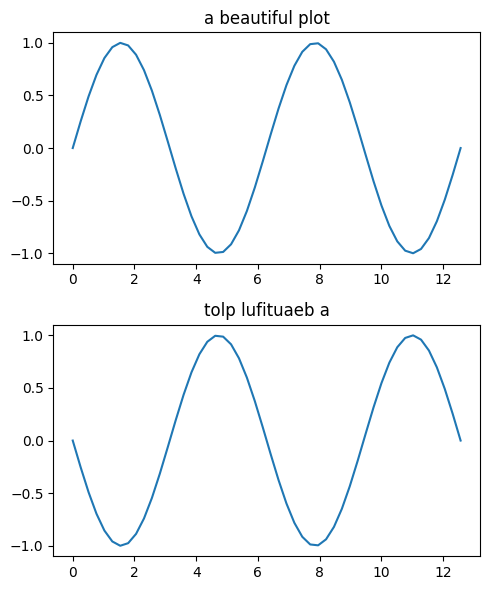

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(5, 6))
axs[0].set_title('a beautiful plot')
axs[0].plot(x, y)
axs[1].set_title('a beautiful plot'[::-1])
axs[1].plot(x, -y)
fig.tight_layout()
plt.show()

## plt.scatter
- Create a 1 x 2 subplot of size (6, 3)
- Open 'scatter.mat' (a matlab file)
    - to open this file, install pymatreader using pip in your environment (please ask for help if you don't know how to do this!)
        - you can also use scipy's .io module if you are familiar with it, but pymatreader can open all types of .mat files and is much faster
    - `from pymatreader import read_mat`
    - `data = read_mat('scatter.mat')`
- Create a scatter plot on the first axes using the two columns in 'data' as x and y by using axs.plot() and specifying the line type as 'o' or '.'
- Now try doing the same thing with axs.scatter on the second axes
- Try coloring each data point using the 'choice' array by passing it to scatter.
- The x and y labels in this case are PC1 and PC2 respectively (it's the principal component from PCA, you'll learn what this is next week)
- Are some of your labels/plots overlapping? Try calling plt.tight_layout() at the end of the cell to fix this

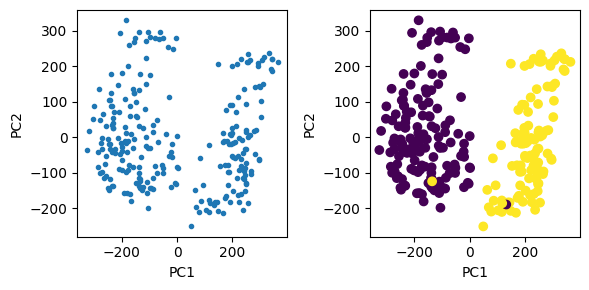

In [5]:
from pymatreader import read_mat
data = read_mat('scatter.mat')
scatter_points = data['s']['data']
choice = data['s']['choice']

fig, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].plot(scatter_points[:, 0], scatter_points[:, 1], '.')
axs[1].scatter(scatter_points[:, 0], scatter_points[:, 1], c=choice)

axs[0].set_xlabel('PC1')
axs[1].set_xlabel('PC1')

axs[0].set_ylabel('PC2')
axs[1].set_ylabel('PC2')

fig.tight_layout()

## Plotting multiple lines at once and labeling
- Open 'pupil.pickle'. It is a file containing the locations of 4 key-points around the retina of a mouse during behavior. The 'locs' dictionary key is an array of shape (position (0: x-pos, 1:y-pos), key-point, time-points). The 'names' key contains the names of each key-point (names[0] corresponds to locs[:, 0, :]).
    - This is a new type of file! To open a .pickle or .pkl file, do the following:
        ```
        import pickle
        with open('pupil.pickle', 'rb') as f:
            data = pickle.load(f)
        ```
- matplotlib allows you to plot more than one line in a single axs.plot() call. If x and y are m x n arrays, it will treat each *n* or each column as a separate line. Try plotting the y-positions of the up and down key points across time for the first 5000 samples. (Hint: you may need to use np.transpose() or np.ndarray.T to change the shape of your array)
- Use axs.set_ylim() to adjust the y-limits so we can see the detail of the lines
- pass the corresponding names as a list to the label argument of plt.plot()
- call axs.legend() to show the legend

Additional—Try customizing your legend in the call to axs.legend()
- loc: set the location with 'upper left', 'upper right', 'lower left', 'lower right'
- ncols: set the number of columns in the legend (e.g. if you want a horizontal legend, ncol should be the number of lines with labels)
- bbox_to_anchor: set the exact location of your legend (including outside of the axes) by passing (x-pos, y-pos)
- frameon: set to False to remove the frame


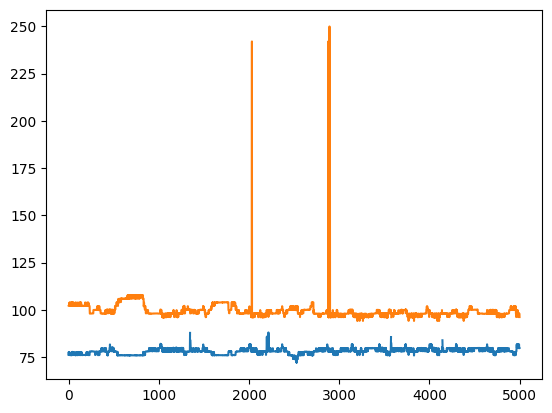

In [24]:
import pickle
with open('pupil.pickle', 'rb') as f:
    data = pickle.load(f)
points = data['locs']

points_of_interest = points[1, :2, :5000].T

plt.plot(points_of_interest)

## plt.hist
Create a histogram of the vertical distance between up and down as well as the horizontal distance between left and right key-points. These should be on the same plot for comparison.
- Use axs.hist() and pass the two distances in as a list of two
- Try creating a custom bin range using np.arange() and passing it in to bins
- Create labels and call axs.legend()

## plt.bar
Create a bar plot with the mean of the vertical/horizontal distances and an error bar with their standard deviation
- For x, pass a list so the bars are at locations 0 and 1
- Pass the means as a list to height (hint: you will need to use np.nanmean() as there are NaNs in the dataset)
- Pass the standard deviation (np.nanstd) to yerr
- Color the plots by passing a list of colors to color
- Edit the xticks with axs.set_xticks() and axs.set_xticklabels() to have only ticks at the bar centers and label them vertical/horizontal



## plt.imshow and looping through axes with np.ravel()
If we want to make multiple subplots of something that can be looped through, we can use np.ravel to flatten the axs numpy array to allow us to loop through it element by element. In this case, we want to visualize how well the key-points are tracking the pupils. To do this, we will use plt.imshow to plot an image of the pupil with the key-points on top of it.

Note: plt.imshow can be used for visualizing any 2d matrix (could be a heatmap, design matrix, etc)

- Load in pupil_vid.npy. This includes the first 1000 frames of the tracking video.
    - `vid = np.load('pupil_vid.npy')`
- Use np.random.randint() to choose 25 random frames from the first 1000 of the video
- Create a 5 x 5 subplot and use np.ravel() to flatten axs
- Write a for-loop to go through each axis, plot the image with imshow, and plot the corresponding key-points on top
- change the colormap to gray
- set x and y limits so that the eye fills the frame
- remove all x and y ticks and their labels
- title each axis with the frame number

## final challenge: creating a spike raster with plt.vlines and psth with plt.hist
- Load tower_spike_acc.pickle
    - this contains two lists named 'right' and 'left'. Each list contains spike times in the anterior cingulate cortex (ACC) after the presentation of left/right stimulus respectively. Each element in each list represents a single trial/presentation of a stimulus.
- Create a 2 x 2 subplot
- On the bottom two plots, create a raster using plt.vlines for the first 50 trials
    - loop through each element in the left/right lists, and pass the spike times for that trial as the first argument in vlines.
    - The next two arguments should be ymin, ymax of the vertical line. You'll want to stagger this for each trial
    - You may want to change the thickness of the lines with the linewidth keyword arguments passed to vlines.
- On the top two plots, bin the spikes into a histogram
    - create your bins with np.arange() from 0 to 0.5 seconds with bin sizes ~0.025-0.1
    - bin the spikes using plt.hist() (hint: you'll need to use np.hstack/vstack/concatenate to concatenate the elements in each list)
        - In this case we just want one long vector, but these functions can also be used to stack 2D arrays into bigger ones. If it's a vector, it must be 2D (i.e. shape=(n, 1) or (1, n)).
- Create labels for your plots
- Save figure
    - Use plt.savefig() to save your figure as a png

Additional: Try to get your figure to look like the one below using the following:
- Pass the following argument to plt.subplots to change the ratio of the plots gridspec_kw={'height_ratios': [1, 3]}
- import seaborn as sns (install it if you need to)
    - call sns.despine() to remove the top and right axis
    - use sns.set_context('talk') to make the font more readable/publication-ready
- remove the xtick labels on the top two plots
- remove the ytick labels on the right two plots
- Make sure you xlim/ylims are the same!
- Set the xlabel by using fig.text() instead so that the subplots have a shared xlabel

<!-- ![image.png](attachment:image.png) -->
<img src="raster_example.png" alt="raster_example.png" width="600"/>
